In [1]:
import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re

In [2]:
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [5]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /home/swissj74/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/swissj74/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
book_filenames = sorted(glob.glob("../*utf8.txt"))

In [7]:
corpus_raw = u""
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r") as book_file:
        corpus_raw += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()

Reading '../MOVIE_10 THINGS I HATE ABOUT YOU.utf8.txt'...
Corpus is now 32768 characters long

Reading '../MOVIE_12 MONKEYS.utf8.txt'...
Corpus is now 65536 characters long

Reading '../MOVIE_1492 CONQUEST OF PARADISE.utf8.txt'...
Corpus is now 98304 characters long

Reading '../MOVIE_15 MINUTES.utf8.txt'...
Corpus is now 131072 characters long

Reading '../MOVIE_16 BLOCKS.utf8.txt'...
Corpus is now 153244 characters long

Reading '../MOVIE_17 AGAIN.utf8.txt'...
Corpus is now 153586 characters long

Reading '../MOVIE_8 MILLIMETER.utf8.txt'...
Corpus is now 186354 characters long

Reading '../MOVIE_ABOVE THE LAW.utf8.txt'...
Corpus is now 186608 characters long

Reading '../MOVIE_ABSOLUTE POWER.utf8.txt'...
Corpus is now 187446 characters long

Reading '../MOVIE_ACE VENTURA PET DETECTIVE.utf8.txt'...
Corpus is now 193523 characters long

Reading '../MOVIE_ADVENTURES OF FORD FAIRLAINE.utf8.txt'...
Corpus is now 226291 characters long

Reading '../MOVIE_AIR FORCE ONE.utf8.txt'...
Corpus i

In [8]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [9]:
raw_sentences = tokenizer.tokenize(corpus_raw)

In [46]:
#convert into a list of words
#rtemove unnnecessary,, split into words, no hyphens
#list of words
from nltk.corpus import stopwords
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    stop = set(stopwords.words('english'))
    words = [i.lower() for i in words if i not in stop]
    
    return words

In [47]:
#sentence where each word is tokenized
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [48]:
print(raw_sentences[5])
print(sentence_to_wordlist(raw_sentences[5]))

The young RIDER dashes over to help, trembling when he sees 
          who his board has hit.
['the', 'young', 'rider', 'dashes', 'help', 'trembling', 'sees', 'board', 'hit']


In [49]:
token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens".format(token_count))

The book corpus contains 1,586,245 tokens


In [50]:
#ONCE we have vectors
#step 3 - build model
#3 main tasks that vectors help with
#DISTANCE, SIMILARITY, RANKING

# Dimensionality of the resulting word vectors.
#more dimensions, more computationally expensive to train
#but also more accurate
#more dimensions = more generalized
num_features = 100
# Minimum word count threshold.
min_word_count = 101

# Number of threads to run in parallel.
#more workers, faster we train
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 7

# Downsample setting for frequent words.
#0 - 1e-5 is good for this
downsampling = 1e-5

# Seed for the RNG, to make the results reproducible.
#random number generator
#deterministic, good for debugging
seed = 1

In [51]:
scripts2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [52]:
scripts2vec.build_vocab(sentences)

2017-02-07 16:05:22,774 : INFO : collecting all words and their counts
2017-02-07 16:05:22,775 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-02-07 16:05:22,798 : INFO : PROGRESS: at sentence #10000, processed 58688 words, keeping 10050 word types
2017-02-07 16:05:22,825 : INFO : PROGRESS: at sentence #20000, processed 114808 words, keeping 14745 word types
2017-02-07 16:05:22,853 : INFO : PROGRESS: at sentence #30000, processed 172210 words, keeping 17573 word types
2017-02-07 16:05:22,879 : INFO : PROGRESS: at sentence #40000, processed 230232 words, keeping 20895 word types
2017-02-07 16:05:22,914 : INFO : PROGRESS: at sentence #50000, processed 288180 words, keeping 23640 word types
2017-02-07 16:05:22,942 : INFO : PROGRESS: at sentence #60000, processed 346748 words, keeping 25765 word types
2017-02-07 16:05:22,970 : INFO : PROGRESS: at sentence #70000, processed 402148 words, keeping 27748 word types
2017-02-07 16:05:22,998 : INFO : PROGRESS: at s

In [53]:
print("Word2Vec vocabulary length:", len(scripts2vec.vocab))

2017-02-07 16:05:24,634 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab


Word2Vec vocabulary length: 2486


In [54]:
scripts2vec.train(sentences)

2017-02-07 16:05:25,862 : INFO : training model with 4 workers on 2486 vocabulary and 100 features, using sg=1 hs=0 sample=1e-05 negative=5 window=7
2017-02-07 16:05:25,863 : INFO : expecting 285154 sentences, matching count from corpus used for vocabulary survey
2017-02-07 16:05:26,886 : INFO : PROGRESS: at 17.46% examples, 162954 words/s, in_qsize 7, out_qsize 1
2017-02-07 16:05:27,894 : INFO : PROGRESS: at 36.03% examples, 168926 words/s, in_qsize 7, out_qsize 0
2017-02-07 16:05:28,905 : INFO : PROGRESS: at 54.68% examples, 170702 words/s, in_qsize 7, out_qsize 1
2017-02-07 16:05:29,912 : INFO : PROGRESS: at 73.50% examples, 172012 words/s, in_qsize 8, out_qsize 0
2017-02-07 16:05:30,912 : INFO : PROGRESS: at 92.08% examples, 172703 words/s, in_qsize 8, out_qsize 0
2017-02-07 16:05:31,302 : INFO : worker thread finished; awaiting finish of 3 more threads
2017-02-07 16:05:31,305 : INFO : worker thread finished; awaiting finish of 2 more threads
2017-02-07 16:05:31,306 : INFO : worker

946434

In [55]:
if not os.path.exists("trained"):
    os.makedirs("trained")

In [56]:
scripts2vec.save(os.path.join("trained", "scripts2vec.w2v"))

2017-02-07 16:05:33,950 : INFO : saving Word2Vec object under trained/scripts2vec.w2v, separately None
2017-02-07 16:05:33,951 : INFO : not storing attribute syn0norm
2017-02-07 16:05:33,952 : INFO : not storing attribute cum_table
2017-02-07 16:05:34,052 : INFO : saved trained/scripts2vec.w2v


In [57]:
scripts2vec = w2v.Word2Vec.load(os.path.join("trained", "scripts2vec.w2v"))

2017-02-07 16:05:41,939 : INFO : loading Word2Vec object from trained/scripts2vec.w2v
2017-02-07 16:05:41,963 : INFO : loading wv recursively from trained/scripts2vec.w2v.wv.* with mmap=None
2017-02-07 16:05:41,964 : INFO : setting ignored attribute syn0norm to None
2017-02-07 16:05:41,965 : INFO : setting ignored attribute cum_table to None
2017-02-07 16:05:41,965 : INFO : loaded trained/scripts2vec.w2v


In [58]:
#my video - how to visualize a dataset easily
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [59]:
all_word_vectors_matrix = scripts2vec.syn0

2017-02-07 16:05:49,410 : WARNING : direct access to syn0 will not be supported in future gensim releases, please use model.wv.syn0


In [60]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [ ]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[scripts2vec.vocab[word].index])
            for word in scripts2vec.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

2017-02-07 16:06:31,791 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-02-07 16:06:31,792 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-02-07 16:06:31,793 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-02-07 16:06:31,793 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-02-07 16:06:31,794 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-02-07 16:06:31,794 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-02-07 16:06:31,795 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-02-07 16:06:31,795 : WARNING : direct access to vocab wil

In [62]:
points.head(10)

,word,x,y
0,lap,-4.841979,-5.494789
1,dennis,2.004667,-3.679531
2,ray,-1.297431,-4.276254
3,envelope,-4.565967,7.392073
4,mid,3.496266,-5.900183
5,absolutely,11.175087,-5.994793
6,dogs,-7.748917,-4.906068
7,english,-7.532499,-3.058599
8,time,-8.885988,-1.144244
9,chairs,-11.017020,2.488066


In [63]:
sns.set_context("poster")

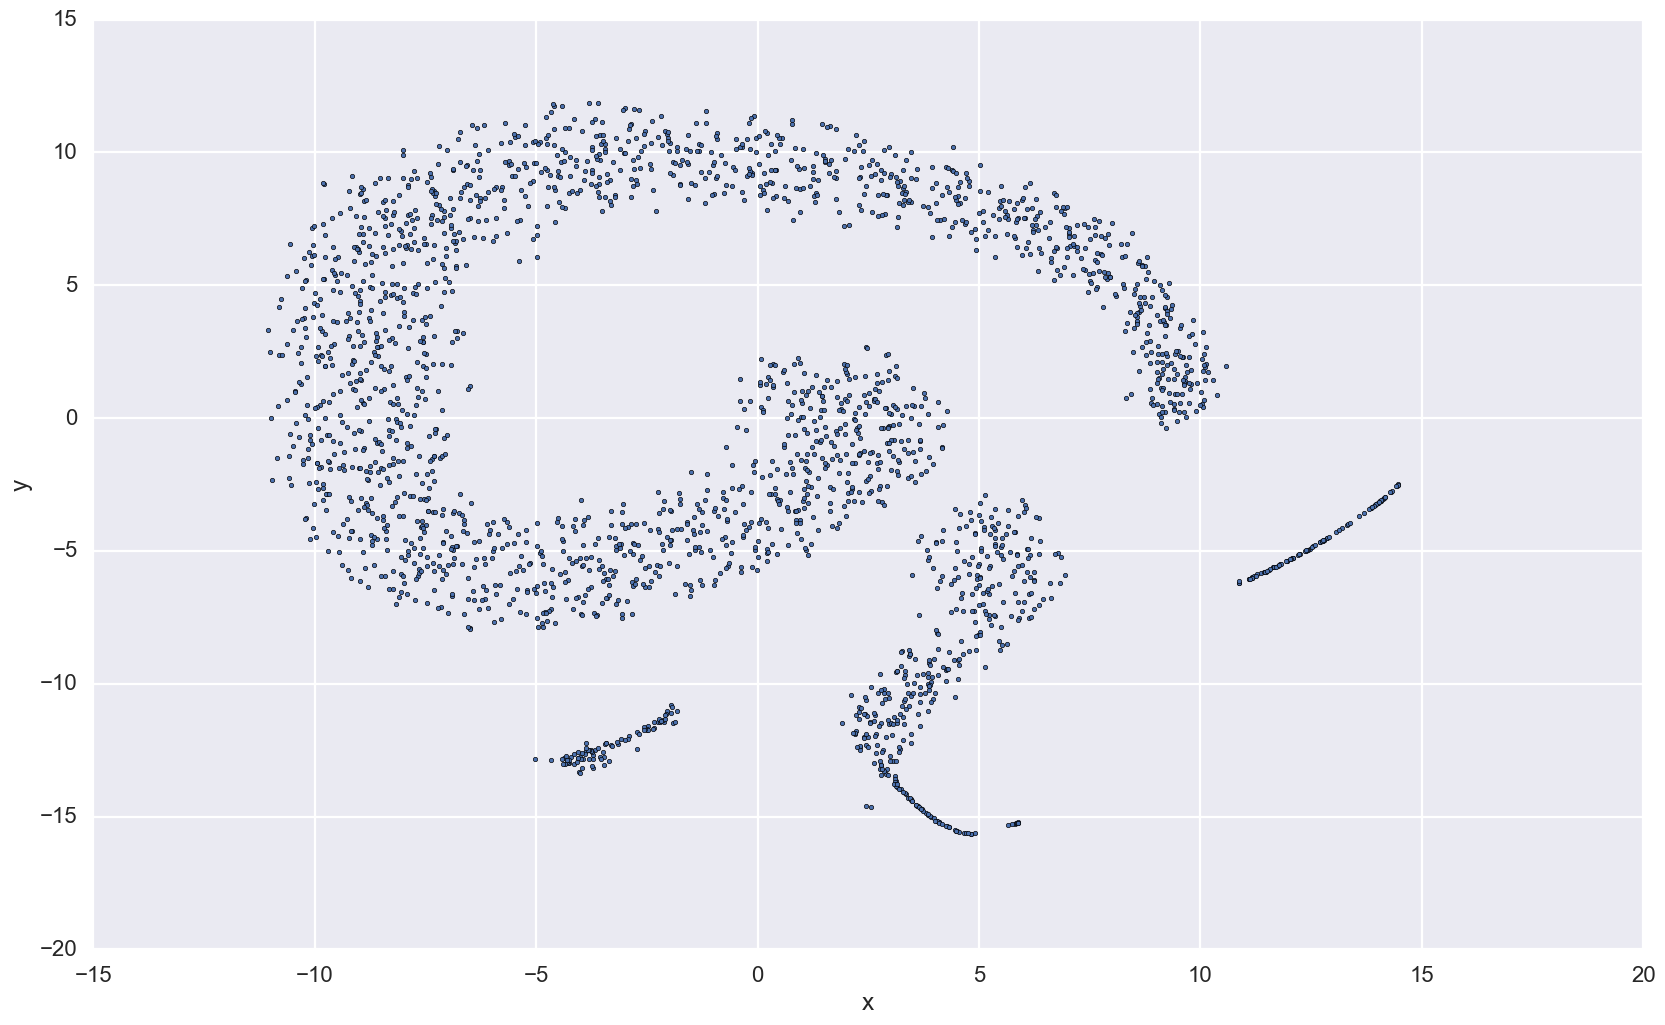

In [64]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [65]:
def plot_region(x_bounds, y_bounds):
    slice = points[(x_bounds[0] <= points.x) & (points.x <= x_bounds[1]) & (y_bounds[0] <= points.y) & (points.y <= y_bounds[1])]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

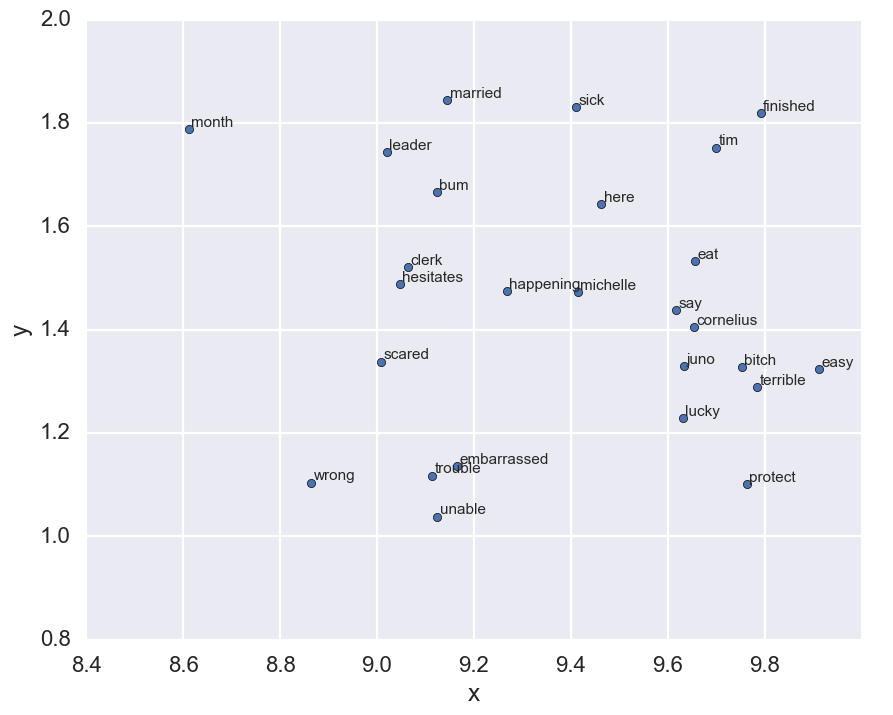

In [66]:
plot_region(x_bounds=(4.0, 10), y_bounds=(1., 2.))

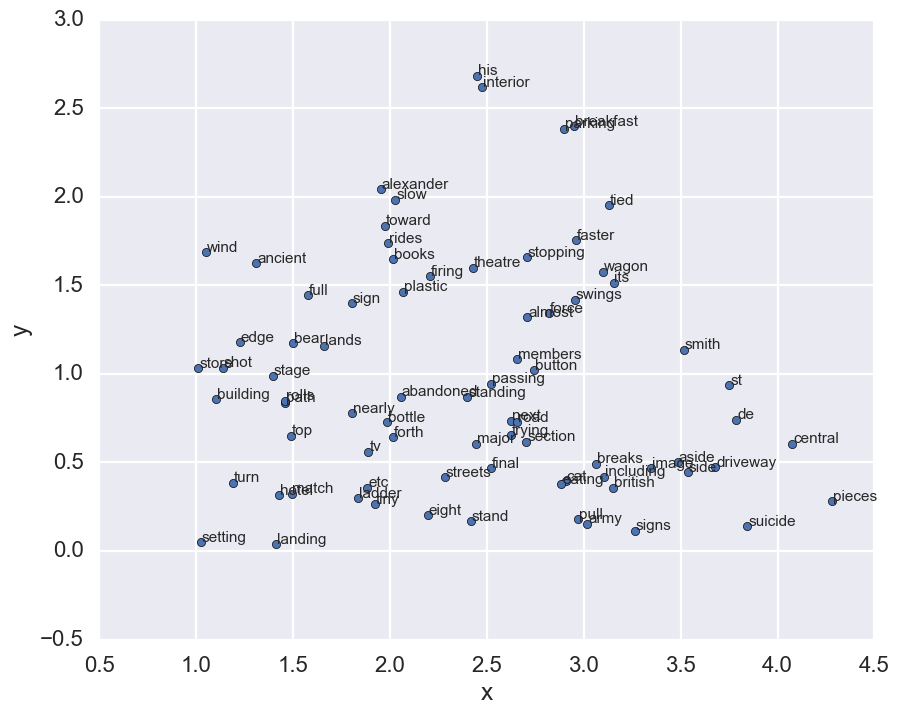

In [70]:
plot_region(x_bounds=(1.0, 5), y_bounds=(0, 5))

In [71]:
scripts2vec.most_similar("love")

2017-02-07 16:11:50,538 : INFO : precomputing L2-norms of word weight vectors


[('thing', 0.9995975494384766),
 ('without', 0.9995921850204468),
 ('staff', 0.999573826789856),
 ('table', 0.9995720982551575),
 ('course', 0.9995609521865845),
 ('presses', 0.9995591640472412),
 ('miami', 0.9995540976524353),
 ('crowded', 0.9995510578155518),
 ('saw', 0.9995510578155518),
 ('name', 0.9995506405830383)]

In [74]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = scripts2vec.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [76]:
nearest_similarity_cosmul("love", "kiss", "anger")

love is related to kiss, as paper is related to anger


'paper'